In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob
from sklearn.utils import shuffle

In [ ]:
IMAGE_SIZE = 224

In [ ]:
main_data_dir = '/content/drive/Shareddrives/2022| MLE Training | Batch 2 | J2J/Saurabh/Capstone'

In [ ]:
dataset_path = '/content/drive/Shareddrives/2022| MLE Training | Batch 2 | J2J/Saurabh/Capstone/voc_plate_dataset'
sub_dirs=os.listdir(dataset_path)
annotations_path = os.path.join(dataset_path, sub_dirs[0])
imageset_path = os.path.join(dataset_path, sub_dirs[1])
images_path = os.path.join(dataset_path, sub_dirs[2])
annotations_path, imageset_path, images_path

('/content/drive/Shareddrives/2022| MLE Training | Batch 2 | J2J/Saurabh/Capstone/voc_plate_dataset/Annotations',
 '/content/drive/Shareddrives/2022| MLE Training | Batch 2 | J2J/Saurabh/Capstone/voc_plate_dataset/ImageSets',
 '/content/drive/Shareddrives/2022| MLE Training | Batch 2 | J2J/Saurabh/Capstone/voc_plate_dataset/JPEGImages')

In [ ]:
# img_data_path = os.path.join(images_path,'*g')
# images = glob.glob(img_data_path)
# gen, rot,mix = 0,0,0
# dont_want_images = []
# for image_str in images:
#   if image_str.find('Gen') != -1 or image_str.find('rotate') != -1:
#     dont_want_images.append(image_str)
# images = list(set(images) - set(dont_want_images))
# images.sort() #We sort the images in alphabetical order to match them to the xml files containing the annotations of the bounding boxes

# annotations = []
# for img_str in images:
#   img_name = img_str.split('/')[-1].split('.')[0]
#   annotations.append(annotations_path+'/'+ img_name+'.xml')

# images[:5], annotations[:5]

In [ ]:
# paths_df = pd.DataFrame(images, columns=['images'])
# paths_df['annotations'] = annotations

In [ ]:
# paths_df.iloc[0]

In [ ]:
# paths_df.to_csv(main_data_dir+'/paths.csv')

In [ ]:
# X=[]
# for i, f1 in enumerate(images):
#     img = cv2.imread(f1)
#     img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
#     X.append(np.array(img))
#     print(f'Image {i} converterd and appened')
# X = np.array(X)
# np.save(main_data_dir + "/Images_array", X)

In [ ]:
#load if you dont wanna do the hard work
X = np.load(main_data_dir + "/Images_array.npy")

In [ ]:
X.shape

(8298, 224, 224, 3)

In [ ]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [ ]:
# y=[]
# for i, anno in enumerate(annotations):
#   resized = resizeannotation(anno)
#   y.append(resized)
#   print(f'Image {i} annotated and appened: {resized}')

# y = np.array(y)
# np.save(main_data_dir + "/Annotations_array",y)

In [ ]:
y = np.load(main_data_dir + "/Annotations_array.npy")

In [ ]:
y[5]

array([136, 134,  94, 115])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape, y.shape

((8298, 224, 224, 3), (8298, 4))

In [ ]:
X, y = shuffle(X,y, random_state=23)

In [ ]:
import random
sample_index = []

for i in range(9):
  sample_index.append(random.randint(0, len(X)))
sample_index

[7072, 7767, 2924, 7141, 1683, 6448, 318, 3550, 1454]

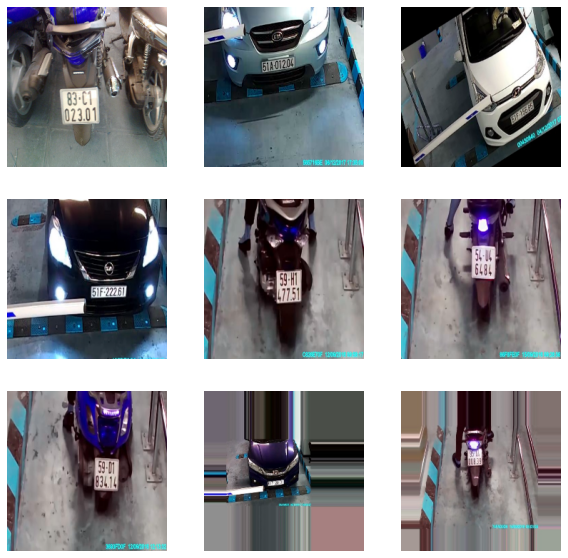

In [ ]:
plt.figure(figsize=(10,10))
# for i, index in enumerate(sample_index):
for i in range(0,9):
  plt.subplot(3,3,i+1)
  plt.axis('off')
  plt.imshow(X[i])

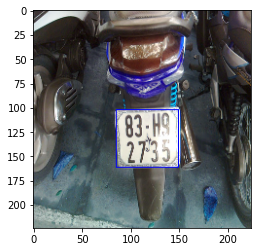

In [ ]:
index = sample_index[2]
image = cv2.rectangle(X[index],(y[index][0],y[index][1]),(y[index][2],y[index][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

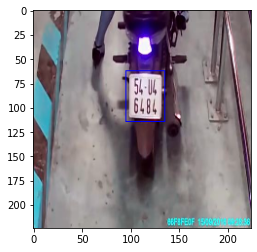

In [ ]:
image = cv2.rectangle(X[5],(y[5][0],y[5][1]),(y[5][2],y[5][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

In [ ]:
X.shape, y.shape

((8298, 224, 224, 3), (8298, 4))

In [ ]:
#Normalise
## SESSION CRASH
X = X/255

In [ ]:
y = y/255

In [ ]:
X_small = X[:2500, :, :, :]
y_small = y[:2500, :]

In [ ]:
X_small.shape, y_small.shape

((2500, 224, 224, 3), (2500, 4))

In [ ]:
X_small = X_small/255

In [ ]:
y_small = y_small/255

In [ ]:
# X_small_2 = X[3000:6000, :, :, :]
# y_small_2 = y[3000:6000, :]
# X_small_2.shape, y_small_2.shape

((3000, 224, 224, 3), (3000, 4))

In [ ]:
# X_small_2 = X_small_2/255
# y_small_2 = y_small_2/255

In [ ]:
# X_small_3 = X[6000:, :, :, :]
# y_small_3 = y[6000:, :]
# X_small_3.shape, y_small_3.shape

((2298, 224, 224, 3), (2298, 4))

In [ ]:
# X_small_3 = X_small_3/255
# y_small_3 = y_small_3/255

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [ ]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape, X_val.shape, y_val.shape,

((1800, 224, 224, 3),
 (1800, 4),
 (500, 224, 224, 3),
 (500, 4),
 (200, 224, 224, 3),
 (200, 4))

In [ ]:
y_train

array([[0.49411765, 0.64313725, 0.38823529, 0.61568627],
       [0.4745098 , 0.69019608, 0.23137255, 0.60784314],
       [0.41960784, 0.61176471, 0.32156863, 0.52156863],
       ...,
       [0.62352941, 0.54901961, 0.5372549 , 0.51372549],
       [0.58039216, 0.48627451, 0.38431373, 0.40392157],
       [0.44313725, 0.46666667, 0.24313725, 0.36862745]])

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation="sigmoid"))

model.layers[-12].trainable = False

model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    min_delta=0,
    patience=5,
    verbose=1,
    mode='auto'
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=0.0001)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping, reduce_lr])

Epoch 1/50
57/57 [==============================] - 35s 363ms/step - loss: 0.0655 - accuracy: 0.3461 - val_loss: 0.1134 - val_accuracy: 0.4900 - lr: 0.0010
Epoch 2/50
57/57 [==============================] - 18s 313ms/step - loss: 0.0400 - accuracy: 0.4189 - val_loss: 0.0406 - val_accuracy: 0.5250 - lr: 0.0010
Epoch 3/50
57/57 [==============================] - 18s 313ms/step - loss: 0.0280 - accuracy: 0.5050 - val_loss: 0.0125 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 4/50
57/57 [==============================] - 18s 316ms/step - loss: 0.0222 - accuracy: 0.5306 - val_loss: 0.0060 - val_accuracy: 0.8100 - lr: 0.0010
Epoch 5/50
57/57 [==============================] - 18s 314ms/step - loss: 0.0179 - accuracy: 0.5772 - val_loss: 0.0051 - val_accuracy: 0.7850 - lr: 0.0010
Epoch 6/50
57/57 [==============================] - 19s 326ms/step - loss: 0.0143 - accuracy: 0.6133 - val_loss: 0.0038 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 7/50
57/57 [==============================] - 18s 311ms/st

In [ ]:
model.save(main_data_dir+'/vgg_model_v1.2.h5')

In [ ]:
model = tf.keras.models.load_model(main_data_dir+'/vgg_model_v1.2.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                        

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 94.20%


In [ ]:
def plot_scores(train, img_name) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Train Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Val Accuracy')
    plt.title('Scores')
    plt.legend()
    plt.savefig(main_data_dir+ '/' + img_name)
    plt.show()

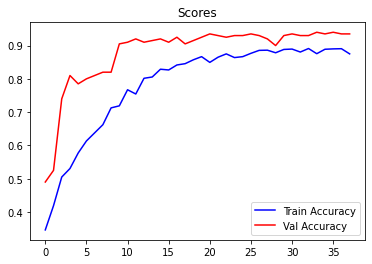

In [ ]:
plot_scores(history, img_name = 'img5.png')

In [ ]:
y_cnn = model.predict(X_test)

In [ ]:
y_cnn[:5]

In [ ]:
y_true[:5]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

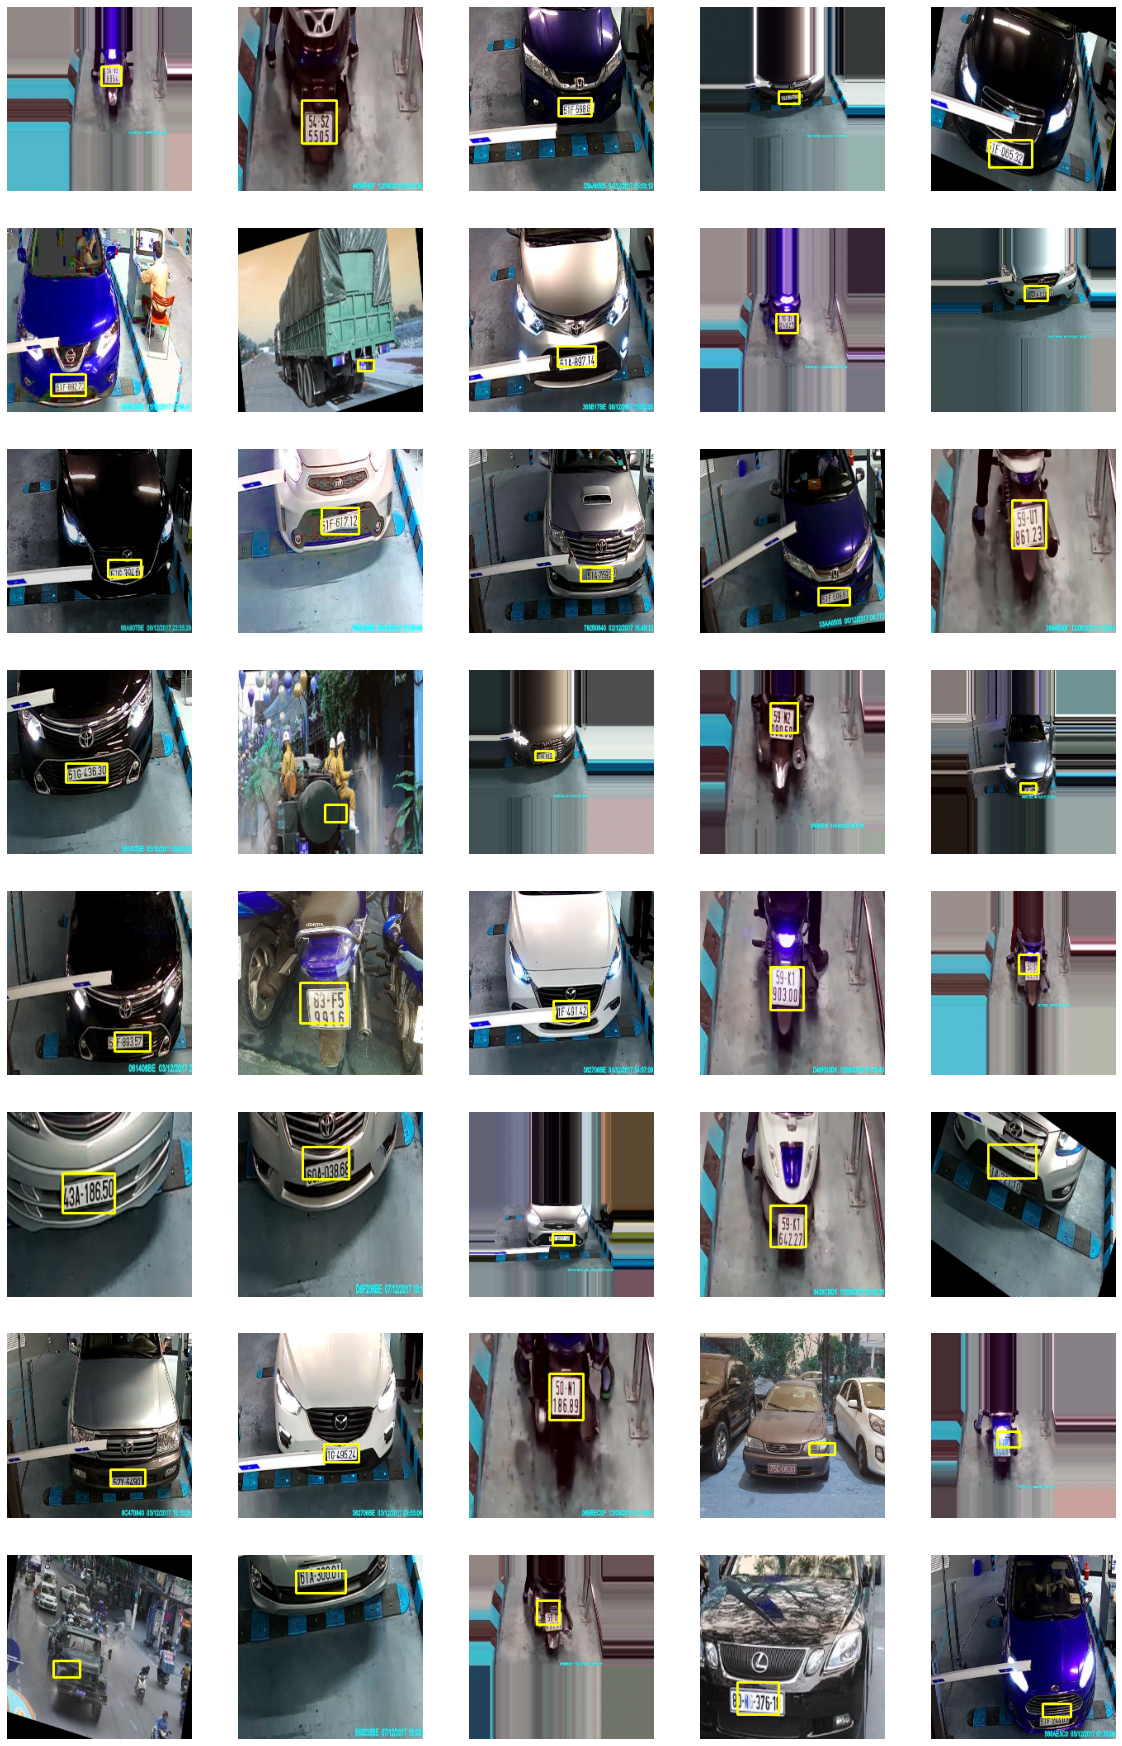

In [ ]:
plt.figure(figsize=(20,40))
for i in range(0,40):
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = y_cnn[i]*255
    image = cv2.rectangle(X_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(255, 255, 0),2)
    plt.imshow(image)
plt.savefig(main_data_dir+ '/' + 'main_predictions.png')

In [ ]:
pretrained_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

mobilenet_model = Sequential()
mobilenet_model.add(pretrained_model)
mobilenet_model.add(Flatten())
mobilenet_model.add(Dense(128, activation="relu"))
mobilenet_model.add(BatchNormalization())
mobilenet_model.add(Dropout(0.3))
mobilenet_model.add(Dense(128, activation="relu"))
mobilenet_model.add(BatchNormalization())
mobilenet_model.add(Dropout(0.3))
mobilenet_model.add(Dense(64, activation="relu"))
mobilenet_model.add(BatchNormalization())
mobilenet_model.add(Dropout(0.3))
mobilenet_model.add(Dense(4, activation="sigmoid"))

mobilenet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 1280)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               163968    
                                                                 
 batch_normalization_6 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 128)              